# Optimizer Example
MNIST RNN example showing comparison between optimizers.

Richard Henry, 15-Jul-2024

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST RNN
Here we compare Adam to optimizers mentioned in the paper.

Adapted from Keras Documentation (via Kaggle).
https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 64
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,   #Optimizer
                myClas,   #Number of Outputs
                myShap,   #Input Array Shape
                myBatc,   #Batch Size
                myEpoc,   #Number of Epochs
                myxTra,   #x_train
                myyTra,   #y_train
                myxTes,   #x_test
                myyTes):  #y_test
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(myClas,
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",
                  optimizer=myOpti,
                  metrics=["accuracy"])
    myHis=model.fit(myxTra,
                    myyTra,
                    batch_size=myBatc,
                    epochs=myEpoc,
                    validation_split=0.1)
    score = model.evaluate(myxTes,
                           myyTes,
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7785 - loss: 0.6852 - val_accuracy: 0.9508 - val_loss: 0.1675
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9275 - loss: 0.2419 - val_accuracy: 0.9517 - val_loss: 0.1483
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9446 - loss: 0.1873 - val_accuracy: 0.9575 - val_loss: 0.1454
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9510 - loss: 0.1639 - val_accuracy: 0.9573 - val_loss: 0.1449
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9576 - loss: 0.1466 - val_accuracy: 0.9587 - val_loss: 0.1498
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9608 - loss: 0.1357 - val_accuracy: 0.9683 - val_loss: 0.1178
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9631 - loss: 0.1279 - val_accuracy: 0.9753 - val_loss: 0.0872
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accuracy:

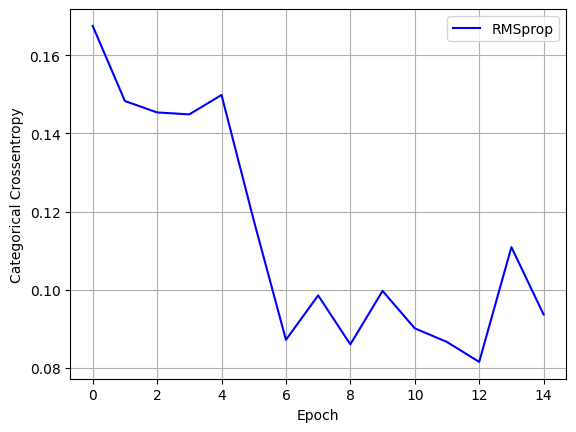

In [8]:
plt.plot(h0.history['val_loss'], color='blue')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop'])
plt.grid()
plt.show()

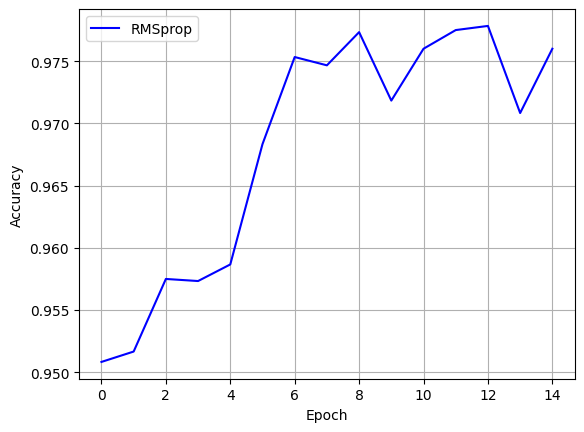

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3341 - loss: 1.9427 - val_accuracy: 0.7305 - val_loss: 0.9768
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7009 - loss: 0.9800 - val_accuracy: 0.8290 - val_loss: 0.6199
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7882 - loss: 0.7028 - val_accuracy: 0.8712 - val_loss: 0.4671
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8290 - loss: 0.5748 - val_accuracy: 0.8925 - val_loss: 0.3875
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8536 - loss: 0.4956 - val_accuracy: 0.9027 - val_loss: 0.3382
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8673 - loss: 0.4495 - val_accuracy: 0.9097 - val_loss: 0.3065
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8793 - loss: 0.4131 - val_accuracy: 0.9158 - val_loss: 0.2845
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8856 - loss: 0.3859 - val_accuracy:

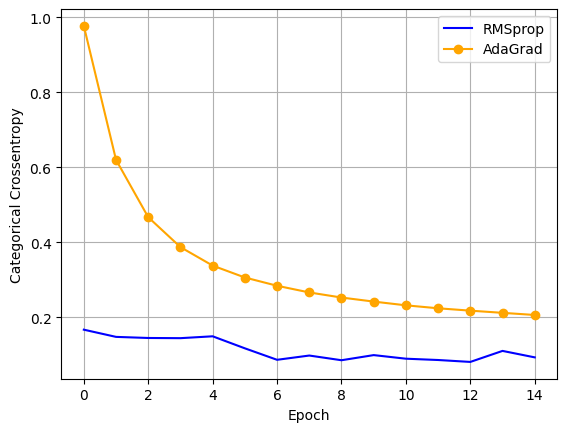

In [11]:
plt.plot(h0.history['val_loss'], color='blue')
plt.plot(h1.history['val_loss'], color='orange',marker='o')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad'])
plt.grid()
plt.show()

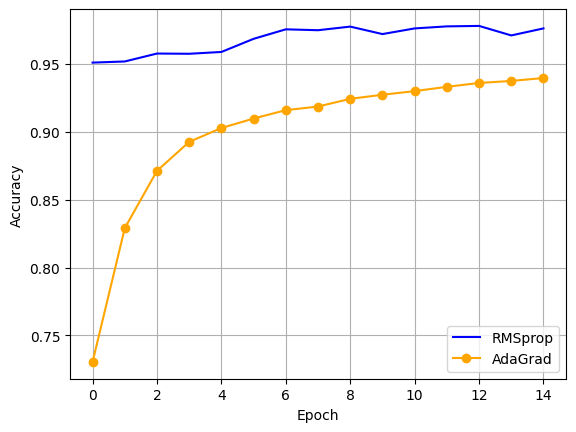

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, SGD + Nesterov Mommentum

In [13]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [14]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6679 - loss: 1.0577 - val_accuracy: 0.9347 - val_loss: 0.2220
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9175 - loss: 0.2856 - val_accuracy: 0.9588 - val_loss: 0.1391
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9398 - loss: 0.2053 - val_accuracy: 0.9658 - val_loss: 0.1106
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9481 - loss: 0.1768 - val_accuracy: 0.9645 - val_loss: 0.1087
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9576 - loss: 0.1458 - val_accuracy: 0.9703 - val_loss: 0.0952
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9607 - loss: 0.1344 - val_accuracy: 0.9708 - val_loss: 0.0955
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9644 - loss: 0.1249 - val_accuracy: 0.9780 - val_loss: 0.0769
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9690 - loss: 0.1071 - val_accuracy: 0.

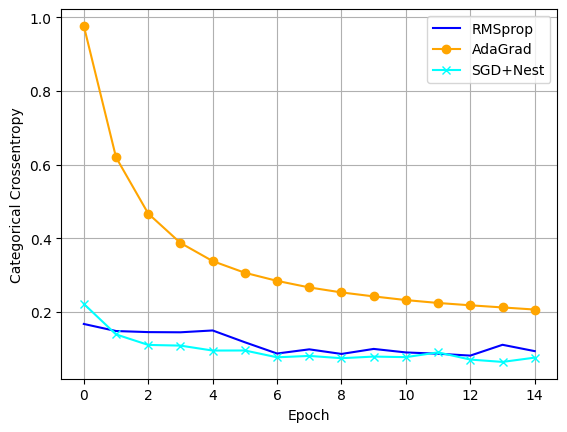

In [15]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest'])
plt.grid()
plt.show()

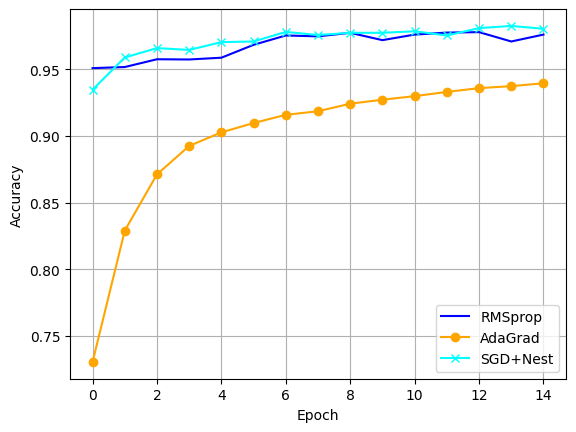

In [16]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Fourth Model, ADAM

In [17]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7697 - loss: 0.6937 - val_accuracy: 0.9518 - val_loss: 0.1649
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9363 - loss: 0.2130 - val_accuracy: 0.9633 - val_loss: 0.1149
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9507 - loss: 0.1676 - val_accuracy: 0.9668 - val_loss: 0.1091
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9559 - loss: 0.1523 - val_accuracy: 0.9692 - val_loss: 0.1099
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9596 - loss: 0.1400 - val_accuracy: 0.9738 - val_loss: 0.0921
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9637 - loss: 0.1244 - val_accuracy: 0.9673 - val_loss: 0.1248
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9645 - loss: 0.1254 - val_accuracy: 0.9720 - val_loss: 0.0992
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9670 - loss: 0.1157 - val_accuracy: 

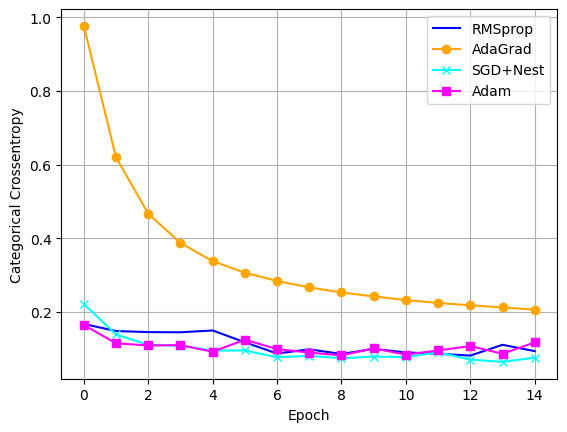

In [18]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.plot(h3.history['val_loss'],color='magenta',marker='s')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

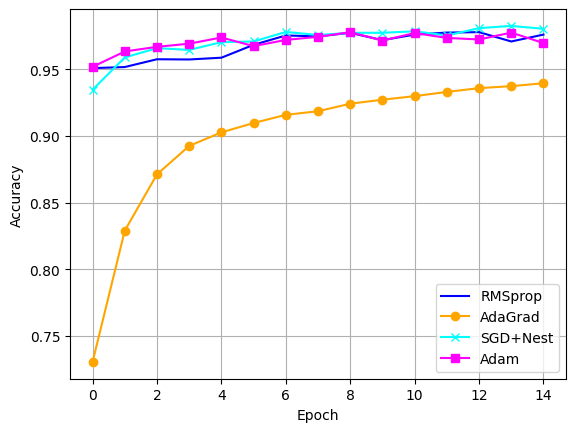

In [19]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

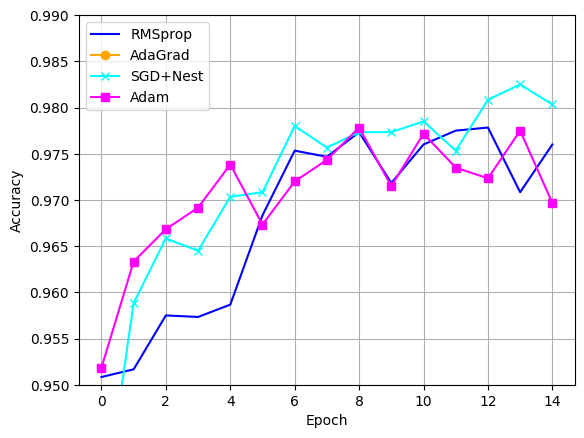

In [20]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.ylim([0.95,0.99])
plt.show()

#### Commentary
Lorem Ipsum
# Conclusions
Blah blah blah